In [25]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib
import os
import csv
import seaborn as sns



In [26]:
file_name = os.path.join("MoSchools3.csv")
MoSchools_data = pd.read_csv(file_name)
MoSchools_data.head()

,district,county,Street Address,city,ZIP,Locale,Student Teacher Ratio,schooltype,Graduation Rate,Proficiency Reading,Advanced Proficiency Reading,Pass Reading,Proficiency Math,Advanced Proficiency Math,Pass math,Proficiency Science,Adanced Proficiency Science,Pass Science
0,BLUE SPRINGS R-IV,Jackson County,1801 NW VESPER,BLUE SPRINGS,64015,Suburb: Large,15.9,Regular School District,94.06,43.5,34.0,77.5,32.0,37.2,69.2,39.8,32.1,71.9
1,CENTER 58,Jackson County,8701 HOLMES RD,KANSAS CITY,64131,City: Large,12.3,Regular School District,91.38,38.0,13.2,51.2,25.6,15.7,41.3,28.7,8.6,37.3
2,EXCELSIOR SPRINGS 40,Clay County,300 W BROADWAY,EXCELSIOR SPRINGS,64024,Town: Fringe,13.4,Regular School District,93.30,40.6,15.0,55.6,28.9,13.0,41.9,38.0,10.1,48.1
3,FORT OSAGE R-I,Jackson County,2101 N TWYMAN RD,INDEPENDENCE,64058,Rural: Fringe,15.0,Regular School District,95.39,42.4,17.3,59.7,26.9,15.6,42.5,35.7,18.1,53.8
4,GRAIN VALLEY R-V,Jackson County,PO BOX 304,GRAIN VALLEY,64029,Suburb: Large,14.4,Regular School District,96.00,50.0,20.4,70.4,31.6,24.5,56.1,41.2,28.8,70.0


In [27]:
Schools = MoSchools_data.iloc[:, [0, 1, 2, 3, 4, 6, 7, 8, 11, 14, 17]]
Schools.head()
#MoSchools_data.drop('Proficiency Reading', 'Advanced Proficiency Reading', 'Proficiency Math', 'Advanced Proficiency Math', 'Profiency Science', 'Advanced Proficiency Science', axis=1)
#MoSchools_data

,district,county,Street Address,city,ZIP,Student Teacher Ratio,schooltype,Graduation Rate,Pass Reading,Pass math,Pass Science
0,BLUE SPRINGS R-IV,Jackson County,1801 NW VESPER,BLUE SPRINGS,64015,15.9,Regular School District,94.06,77.5,69.2,71.9
1,CENTER 58,Jackson County,8701 HOLMES RD,KANSAS CITY,64131,12.3,Regular School District,91.38,51.2,41.3,37.3
2,EXCELSIOR SPRINGS 40,Clay County,300 W BROADWAY,EXCELSIOR SPRINGS,64024,13.4,Regular School District,93.30,55.6,41.9,48.1
3,FORT OSAGE R-I,Jackson County,2101 N TWYMAN RD,INDEPENDENCE,64058,15.0,Regular School District,95.39,59.7,42.5,53.8
4,GRAIN VALLEY R-V,Jackson County,PO BOX 304,GRAIN VALLEY,64029,14.4,Regular School District,96.00,70.4,56.1,70.0


In [28]:
file_name = os.path.join("zillow_realtor_homes_201804.csv")
House_data = pd.read_csv(file_name)
House_data.head()

,ZIP,size rank,price,bedroom,Nielson household rank,hotness rank,supply score,demand score,median days on market
0,66062,57,243300,2,74,574,90.94160,95.15714,29
1,66062,59,347300,5,74,574,90.94160,95.15714,29
2,66062,68,277600,4,74,574,90.94160,95.15714,29
3,66062,69,215500,3,74,574,90.94160,95.15714,29
4,66061,256,125200,2,398,5683,50.86883,73.84731,58


In [29]:
merge_table = pd.merge(Schools, House_data, on="ZIP", how="inner")
merge_table

,district,county,Street Address,city,ZIP,Student Teacher Ratio,schooltype,Graduation Rate,Pass Reading,Pass math,Pass Science,size rank,price,bedroom,Nielson household rank,hotness rank,supply score,demand score,median days on market
0,BLUE SPRINGS R-IV,Jackson County,1801 NW VESPER,BLUE SPRINGS,64015,15.9,Regular School District,94.06,77.5,69.2,71.9,2015,248000,5,3115,1312,80.79794,93.17483,37
1,BLUE SPRINGS R-IV,Jackson County,1801 NW VESPER,BLUE SPRINGS,64015,15.9,Regular School District,94.06,77.5,69.2,71.9,2159,129600,2,3115,1312,80.79794,93.17483,37
2,BLUE SPRINGS R-IV,Jackson County,1801 NW VESPER,BLUE SPRINGS,64015,15.9,Regular School District,94.06,77.5,69.2,71.9,2425,242400,4,3115,1312,80.79794,93.17483,37
3,BLUE SPRINGS R-IV,Jackson County,1801 NW VESPER,BLUE SPRINGS,64015,15.9,Regular School District,94.06,77.5,69.2,71.9,2481,172800,3,3115,1312,80.79794,93.17483,37
4,CENTER 58,Jackson County,8701 HOLMES RD,KANSAS CITY,64131,12.3,Regular School District,91.38,51.2,41.3,37.3,2678,214500,5,4582,3281,75.25877,75.28386,40
5,CENTER 58,Jackson County,8701 HOLMES RD,KANSAS CITY,64131,12.3,Regular School District,91.38,51.2,41.3,37.3,2973,79900,2,4582,3281,75.25877,75.28386,40
6,CENTER 58,Jackson County,8701 HOLMES RD,KANSAS CITY,64131,12.3,Regular School District,91.38,51.2,41.3,37.3,3318,190700,4,4582,3281,75.25877,75.28386,40
7,CENTER 58,Jackson County,8701 HOLMES RD,KANSAS CITY,64131,12.3,Regular School District,91.38,51.2,41.3,37.3,3395,167400,3,4582,3281,75.25877,75.28386,40
8,EXCELSIOR SPRINGS 40,Clay County,300 W BROADWAY,EXCELSIOR SPRINGS,64024,13.4,Regular School District,93.30,55.6,41.9,48.1,1710,81700,1,7031,2664,75.25877,82.00866,40
9,EXCELSIOR SPRINGS 40,Clay County,300 W BROADWAY,EXCELSIOR SPRINGS,64024,13.4,Regular School District,93.30,55.6,41.9,48.1,4599,82300,2,7031,2664,75.25877,82.00866,40


In [30]:
file_name = os.path.join("school_housing.csv")
merge_table.to_csv(file_name, index=False)

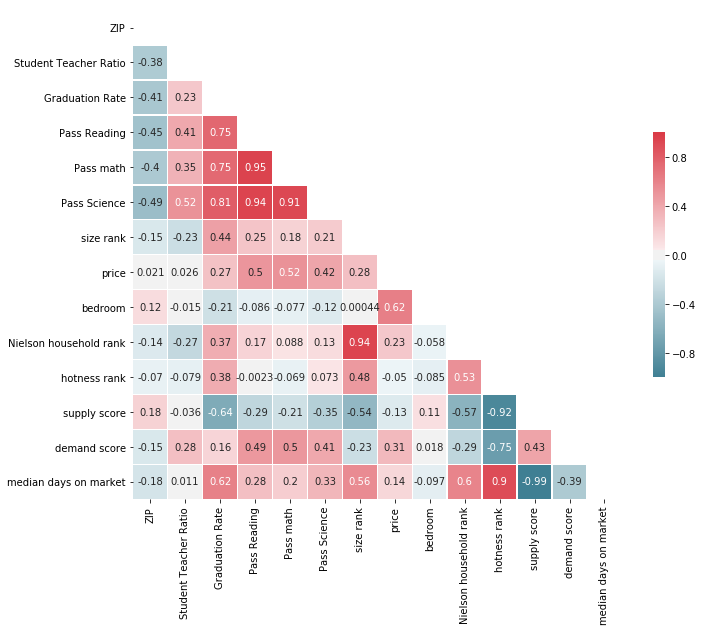

In [31]:
corr = merge_table.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .5})

In [47]:

plt.savefig('school_price_correlation_heatmap.png')

In [48]:
X = merge_table['Graduation Rate']
X = X.values.reshape(-1,1) # Sci-kit learn wants x values as a multi-dimensional array, not just sqft_living
Y = merge_table['price']

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=2)

In [50]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [51]:
def RegressionPlot(X, Y, model):
    plt.figure(figsize=(8,8))
    plt.scatter(X, Y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)
    return 

def ResidualPlot(X_train, X_test, y_train, y_test, model):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    plt.figure(figsize=(10,10))
    plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data', s=30)
    plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data', s=30)
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.legend(loc='upper left')
    plt.hlines(y=0, xmin=-10, xmax=2000000, color='black', lw=2)
    plt.tight_layout()
    return

def TrueValue(X_test, y_test, model):
    fig = plt.figure(figsize=(8,8))
    plt.scatter(y_test, model.predict(X_test), alpha = 0.8, s=2)
    plt.plot(y_test, y_test, color='black', lw=1)
    plt.xlabel('True Test values Price ($)')
    plt.ylabel('My Estimation Price ($)')

Text(0,0.5,'Price')

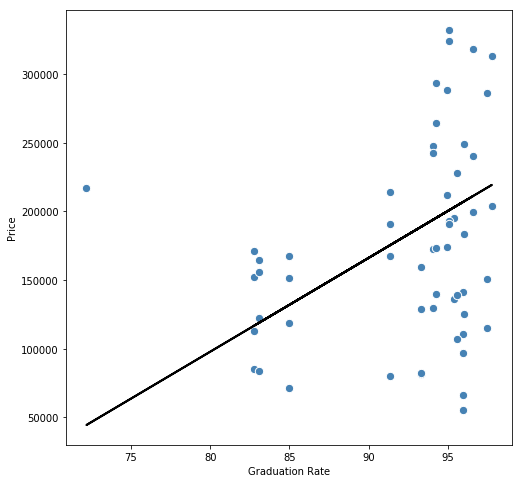

In [37]:
RegressionPlot(X, Y, model)  
plt.xlabel('Graduation Rate')
plt.ylabel('Price')


In [52]:
plt.savefig('regr_gradrate.png')

Text(0,0.5,'Price')

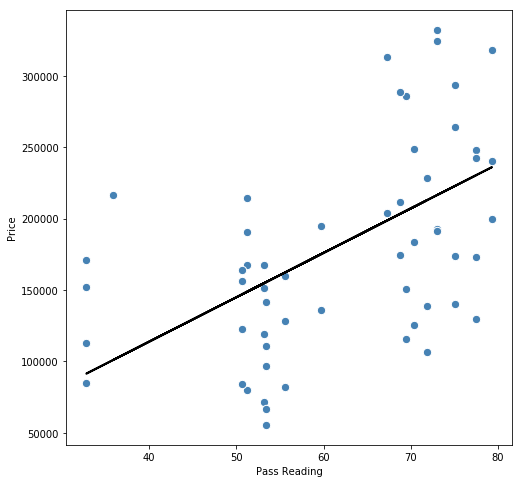

In [53]:
X = merge_table['Pass Reading']
X = X.values.reshape(-1,1) # Sci-kit learn wants x values as a multi-dimensional array, not just sqft_living
Y = merge_table['price']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=2)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

def RegressionPlot(X, Y, model):
    plt.figure(figsize=(8,8))
    plt.scatter(X, Y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)
    return 

def ResidualPlot(X_train, X_test, y_train, y_test, model):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    plt.figure(figsize=(10,10))
    plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data', s=30)
    plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data', s=30)
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.legend(loc='upper left')
    plt.hlines(y=0, xmin=-10, xmax=2000000, color='black', lw=2)
    plt.tight_layout()
    return

def TrueValue(X_test, y_test, model):
    fig = plt.figure(figsize=(8,8))
    plt.scatter(y_test, model.predict(X_test), alpha = 0.8, s=2)
    plt.plot(y_test, y_test, color='black', lw=1)
    plt.xlabel('True Test values Price ($)')
    plt.ylabel('My Estimation Price ($)')
    
RegressionPlot(X, Y, model)  
plt.xlabel('Pass Reading')
plt.ylabel('Price')

In [54]:
plt.savefig('regr_read.png')

Text(0,0.5,'Price')

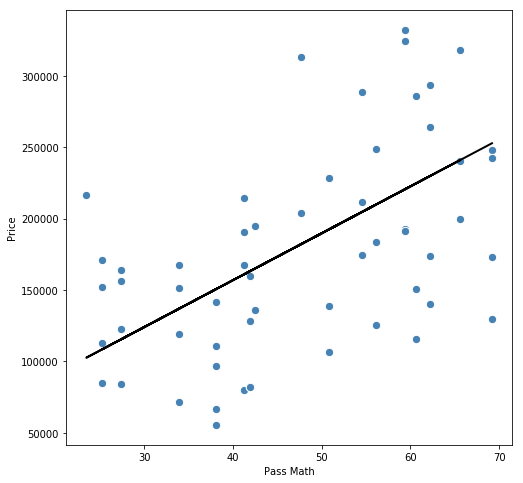

In [55]:
X = merge_table['Pass math']
X = X.values.reshape(-1,1) # Sci-kit learn wants x values as a multi-dimensional array, not just sqft_living
Y = merge_table['price']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=2)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

def RegressionPlot(X, Y, model):
    plt.figure(figsize=(8,8))
    plt.scatter(X, Y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)
    return 

def ResidualPlot(X_train, X_test, y_train, y_test, model):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    plt.figure(figsize=(10,10))
    plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data', s=30)
    plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data', s=30)
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.legend(loc='upper left')
    plt.hlines(y=0, xmin=-10, xmax=2000000, color='black', lw=2)
    plt.tight_layout()
    return

def TrueValue(X_test, y_test, model):
    fig = plt.figure(figsize=(8,8))
    plt.scatter(y_test, model.predict(X_test), alpha = 0.8, s=2)
    plt.plot(y_test, y_test, color='black', lw=1)
    plt.xlabel('True Test values Price ($)')
    plt.ylabel('My Estimation Price ($)')
    
RegressionPlot(X, Y, model)  
plt.xlabel('Pass Math')
plt.ylabel('Price')

In [56]:
plt.savefig('regr_math.png')

Text(0,0.5,'Price')

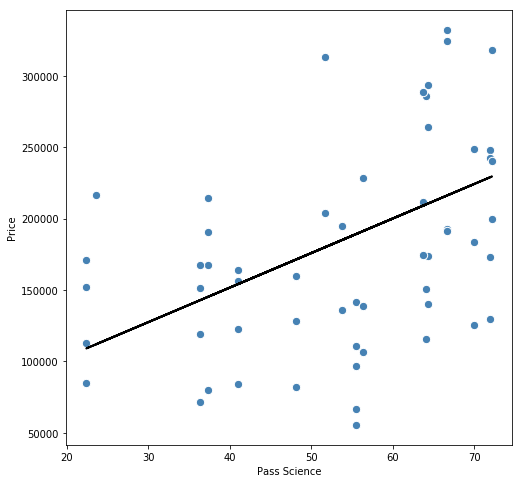

In [57]:
X = merge_table['Pass Science']
X = X.values.reshape(-1,1) # Sci-kit learn wants x values as a multi-dimensional array, not just sqft_living
Y = merge_table['price']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=2)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

def RegressionPlot(X, Y, model):
    plt.figure(figsize=(8,8))
    plt.scatter(X, Y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)
    return 

def ResidualPlot(X_train, X_test, y_train, y_test, model):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    plt.figure(figsize=(10,10))
    plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data', s=30)
    plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data', s=30)
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.legend(loc='upper left')
    plt.hlines(y=0, xmin=-10, xmax=2000000, color='black', lw=2)
    plt.tight_layout()
    return

def TrueValue(X_test, y_test, model):
    fig = plt.figure(figsize=(8,8))
    plt.scatter(y_test, model.predict(X_test), alpha = 0.8, s=2)
    plt.plot(y_test, y_test, color='black', lw=1)
    plt.xlabel('True Test values Price ($)')
    plt.ylabel('My Estimation Price ($)')
    
RegressionPlot(X, Y, model)  
plt.xlabel('Pass Science')
plt.ylabel('Price')

In [58]:
plt.savefig('regr_science.png')